In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("FINAL_SPINNY_900.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_Name              976 non-null    object 
 1   Make                  976 non-null    object 
 2   Model                 976 non-null    object 
 3   Make_Year             976 non-null    int64  
 4   Color                 976 non-null    object 
 5   Body_Type             976 non-null    object 
 6   Mileage_Run           976 non-null    float64
 7   No_of_Owners          976 non-null    object 
 8   Seating_Capacity      976 non-null    int64  
 9   Fuel_Type             976 non-null    object 
 10  Fuel_Tank_Capacity_L  976 non-null    int64  
 11  Engine_Type           976 non-null    object 
 12  CC_Displacement       976 non-null    int64  
 13  Transmission          976 non-null    object 
 14  Transmission_Type     976 non-null    object 
 15  Power_BHP             9

In [4]:
#make

In [5]:
data['Make']= data.get('Make').replace('Hyundai', 16)
data['Make']= data.get('Make').replace('Maruti Suzuki', 15)
data['Make']= data.get('Make').replace('Honda', 14)
data['Make']= data.get('Make').replace('Renault', 13)
data['Make']= data.get('Make').replace('Ford', 12)
data['Make']= data.get('Make').replace('Toyota', 11)
data['Make']= data.get('Make').replace('MG Motors', 10)
data['Make']= data.get('Make').replace('Volkswagen', 9)
data['Make']= data.get('Make').replace('Tata', 8)
data['Make']= data.get('Make').replace('Mahindra', 6)
data['Make']= data.get('Make').replace('Kia', 5)
data['Make']= data.get('Make').replace('Chevrolet', 4)
data['Make']= data.get('Make').replace('Skoda', 3)
data['Make']= data.get('Make').replace('Nissan', 2)
data['Make']= data.get('Make').replace('Jeep', 1)
data['Make']= data.get('Make').replace('Datsun', 0)


In [6]:
data.Make.value_counts().head()

16    305
15    293
14     73
13     68
12     52
Name: Make, dtype: int64

In [7]:
#color

In [8]:
data['Color']= data.get('Color').replace('white', 15)
data['Color']= data.get('Color').replace('red', 14)
data['Color']= data.get('Color').replace('grey', 13)
data['Color']= data.get('Color').replace('silver', 12)
data['Color']= data.get('Color').replace('blue', 11)
data['Color']= data.get('Color').replace('brown', 10)
data['Color']= data.get('Color').replace('black', 9)
data['Color']= data.get('Color').replace('orange', 8)
data['Color']= data.get('Color').replace('bronze', 7)
data['Color']= data.get('Color').replace('beige', 6)
data['Color']= data.get('Color').replace('yellow', 5)
data['Color']= data.get('Color').replace('purple', 4)
data['Color']= data.get('Color').replace('golden', 3)
data['Color']= data.get('Color').replace('maroon', 2)
data['Color']= data.get('Color').replace('green', 1)

In [9]:
#Body_Type

In [10]:
data['Body_Type']= data.get('Body_Type').replace('hatchback', 5)
data['Body_Type']= data.get('Body_Type').replace('sedan', 4)
data['Body_Type']= data.get('Body_Type').replace('suv', 3)
data['Body_Type']= data.get('Body_Type').replace('muv', 2)
data['Body_Type']= data.get('Body_Type').replace('crossover', 1)

In [11]:
#No_of_Owners

In [12]:
data['No_of_Owners']= data.get('No_of_Owners').replace('1st', 3)
data['No_of_Owners']= data.get('No_of_Owners').replace('2nd', 2)
data['No_of_Owners']= data.get('No_of_Owners').replace('3rd', 1)

In [13]:
#Fuel_Type

In [14]:
data['Fuel_Type']= data.get('Fuel_Type').replace('petrol', 3)
data['Fuel_Type']= data.get('Fuel_Type').replace('diesel', 2)
data['Fuel_Type']= data.get('Fuel_Type').replace('petrol+cng', 1)

In [15]:
#Transmission

In [16]:
data['Transmission']= data.get('Transmission').replace('5-Speed', 5)
data['Transmission']= data.get('Transmission').replace('6-Speed', 4)
data['Transmission']= data.get('Transmission').replace('4-Speed', 3)
data['Transmission']= data.get('Transmission').replace('7-Speed', 2)
data['Transmission']= data.get('Transmission').replace('CVT', 1)

In [17]:
#Transmission_Type

In [18]:
data['Transmission_Type']= data.get('Transmission_Type').replace('Automatic', 2)
data['Transmission_Type']= data.get('Transmission_Type').replace('Manual', 1)

In [19]:
#Emission

In [20]:
data['Emission']= data.get('Emission').replace('BS III', 1)
data['Emission']= data.get('Emission').replace('BS IV', 3)
data['Emission']= data.get('Emission').replace('BS V', 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_Name              976 non-null    object 
 1   Make                  976 non-null    int64  
 2   Model                 976 non-null    object 
 3   Make_Year             976 non-null    int64  
 4   Color                 976 non-null    int64  
 5   Body_Type             976 non-null    int64  
 6   Mileage_Run           976 non-null    float64
 7   No_of_Owners          976 non-null    int64  
 8   Seating_Capacity      976 non-null    int64  
 9   Fuel_Type             976 non-null    int64  
 10  Fuel_Tank_Capacity_L  976 non-null    int64  
 11  Engine_Type           976 non-null    object 
 12  CC_Displacement       976 non-null    int64  
 13  Transmission          976 non-null    int64  
 14  Transmission_Type     976 non-null    int64  
 15  Power_BHP             9

In [22]:
data.drop(columns=['Car_Name', 'Model', 'Engine_Type'], axis=1, inplace= True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  976 non-null    int64  
 1   Make_Year             976 non-null    int64  
 2   Color                 976 non-null    int64  
 3   Body_Type             976 non-null    int64  
 4   Mileage_Run           976 non-null    float64
 5   No_of_Owners          976 non-null    int64  
 6   Seating_Capacity      976 non-null    int64  
 7   Fuel_Type             976 non-null    int64  
 8   Fuel_Tank_Capacity_L  976 non-null    int64  
 9   CC_Displacement       976 non-null    int64  
 10  Transmission          976 non-null    int64  
 11  Transmission_Type     976 non-null    int64  
 12  Power_BHP             976 non-null    float64
 13  Torque_Nm             976 non-null    float64
 14  Mileage_kmpl          976 non-null    float64
 15  Emission              9

In [24]:
X= data.drop('Price', axis = 1)

In [25]:
y= data['Price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20, random_state = 45)

In [27]:
X_train

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity_L,CC_Displacement,Transmission,Transmission_Type,Power_BHP,Torque_Nm,Mileage_kmpl,Emission
231,16,2015,12,5,54287.0,3,5,3,43,1197,5,1,82.00,114.0,18.90,3
321,15,2019,15,4,11499.0,3,5,3,37,1197,5,2,88.50,113.0,23.26,2
128,12,2014,12,3,97902.0,3,5,2,52,1498,5,1,89.00,204.0,22.70,1
813,15,2019,11,5,31171.0,3,5,3,37,1197,5,1,81.80,113.0,21.01,2
350,15,2015,12,5,53848.0,2,5,3,35,998,5,2,67.04,90.0,23.10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,16,2015,12,5,38156.0,2,5,3,35,1197,5,1,78.90,111.8,20.36,1
892,16,2020,11,4,41843.0,3,5,3,45,1497,5,2,113.00,144.0,18.40,3
643,15,2012,14,5,39719.0,3,5,3,45,1197,5,1,85.00,113.0,18.50,3
414,15,2017,15,5,79503.0,3,5,3,35,998,5,2,67.04,90.0,23.10,3


In [28]:
y_train

231     458000.0
321     812000.0
128     562000.0
813     812000.0
350     415000.0
         ...    
544     406000.0
892    1448000.0
643     422000.0
414     464000.0
971     956000.0
Name: Price, Length: 780, dtype: float64

In [29]:
X_test

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity_L,CC_Displacement,Transmission,Transmission_Type,Power_BHP,Torque_Nm,Mileage_kmpl,Emission
773,12,2013,12,3,95381.0,3,5,2,52,1498,5,1,89.00,204.00,22.70,1
419,16,2017,14,3,68295.0,2,5,3,60,1591,4,1,122.00,154.00,15.29,3
223,13,2016,8,3,69658.0,3,5,2,50,1461,4,1,108.45,245.00,19.60,2
958,15,2018,14,3,31570.0,3,5,2,48,1248,5,2,89.00,200.00,24.30,2
133,11,2018,15,5,18170.0,3,5,3,45,1197,5,1,79.00,104.00,18.16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,16,2018,10,1,34075.0,2,5,3,45,1197,5,1,82.00,115.00,17.19,2
653,15,2012,12,5,46627.0,3,5,3,45,1197,5,1,85.00,113.00,18.50,3
922,16,2019,11,3,18398.0,2,5,3,45,998,4,1,118.35,171.60,18.27,3
933,16,2017,12,4,22538.0,2,5,3,43,1197,3,1,81.86,113.75,20.14,2


In [30]:
y_test

773     559000.0
419     977000.0
223     912000.0
958    1152000.0
133     658000.0
         ...    
84      694000.0
653     412000.0
922     907000.0
933     651000.0
51      508000.0
Name: Price, Length: 196, dtype: float64

In [31]:
regr = DecisionTreeRegressor()

In [32]:
regr.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
yest_train = regr.predict(X_train)

[Text(0.5850282280428919, 0.9761904761904762, 'x[12] <= 103.225\nsquared_error = 122178605581.854\nsamples = 780\nvalue = 731592.308'),
 Text(0.29456469136070995, 0.9285714285714286, 'x[8] <= 36.5\nsquared_error = 32339755809.92\nsamples = 558\nvalue = 576021.505'),
 Text(0.13766149730294067, 0.8809523809523809, 'x[1] <= 2014.5\nsquared_error = 14051706515.611\nsamples = 193\nvalue = 420829.016'),
 Text(0.06552331651296328, 0.8333333333333334, 'x[1] <= 2013.5\nsquared_error = 3291328947.368\nsamples = 76\nvalue = 336500.0'),
 Text(0.036040542891943625, 0.7857142857142857, 'x[12] <= 86.85\nsquared_error = 2189332102.185\nsamples = 57\nvalue = 317298.246'),
 Text(0.03464851226726988, 0.7380952380952381, 'x[15] <= 2.5\nsquared_error = 1359059948.98\nsamples = 56\nvalue = 313392.857'),
 Text(0.01178875935270576, 0.6904761904761905, 'x[13] <= 79.5\nsquared_error = 663471453.287\nsamples = 34\nvalue = 330617.647'),
 Text(0.002784061249347486, 0.6428571428571429, 'x[1] <= 2012.5\nsquared_erro

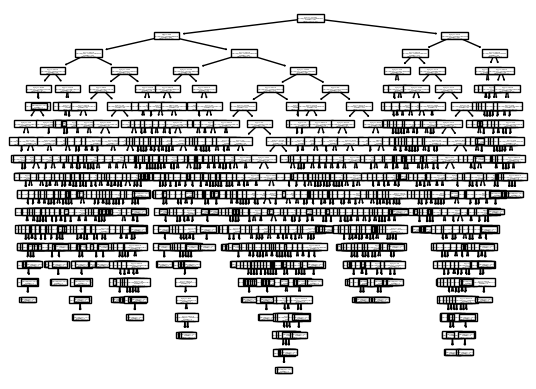

In [34]:
tree.plot_tree(regr.fit(X_train, y_train))

1399

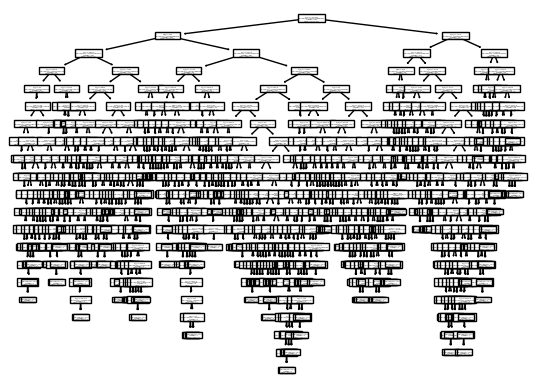

In [35]:
len(tree.plot_tree(regr.fit(X_train, y_train)))

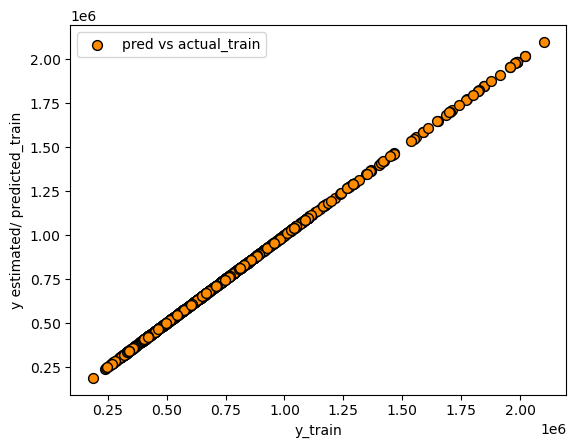

In [36]:
plt.figure()
plt.scatter(y_train, yest_train, s =50,edgecolor = "black",
           c = 'darkorange', label = 'pred vs actual_train')
plt.xlabel('y_train')
plt.ylabel('y estimated/ predicted_train')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, yest_train)
print(mse_train)

0.0


In [38]:
yest_test = regr.predict(X_test)

In [39]:
test_residual = y_test - yest_test

In [40]:
mse_test = mean_squared_error(y_test, yest_test)
print(mse_test)

14104826530.612246


In [41]:
depth = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
mse_train, mse_test = [], []
for i in depth:
    prdctr = DecisionTreeRegressor(max_depth = i)
    prdctr.fit(X_train, y_train)
    y_train_pred= prdctr.predict(X_train)
    y_test_pred= prdctr.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))
    

In [42]:
depth

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

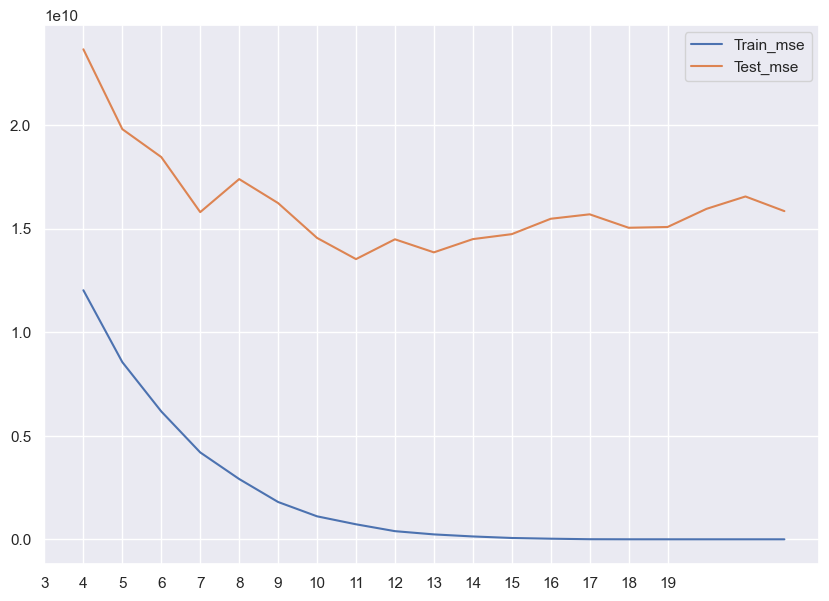

In [43]:
sns.set()
plt.figure(figsize=(10,7))
sns.lineplot(y=mse_train, x= depth, label = 'Train_mse')
sns.lineplot(y=mse_test, x= depth, label = 'Test_mse')
plt.xticks(ticks = np.arange(3,20,1))
plt.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  976 non-null    int64  
 1   Make_Year             976 non-null    int64  
 2   Color                 976 non-null    int64  
 3   Body_Type             976 non-null    int64  
 4   Mileage_Run           976 non-null    float64
 5   No_of_Owners          976 non-null    int64  
 6   Seating_Capacity      976 non-null    int64  
 7   Fuel_Type             976 non-null    int64  
 8   Fuel_Tank_Capacity_L  976 non-null    int64  
 9   CC_Displacement       976 non-null    int64  
 10  Transmission          976 non-null    int64  
 11  Transmission_Type     976 non-null    int64  
 12  Power_BHP             976 non-null    float64
 13  Torque_Nm             976 non-null    float64
 14  Mileage_kmpl          976 non-null    float64
 15  Emission              9

In [46]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.3, random_state = 123)

In [47]:
regressor = RandomForestRegressor(n_estimators =100, max_depth = 4, random_state = 0 )

In [48]:
mod = regressor.fit(x_train,y_train)

In [49]:
y_pred  = mod.predict(x_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)

In [51]:
mse

14546331602.610617

In [52]:
RMSE = np.sqrt(mse)
print(RMSE)

120608.17386317818


In [53]:
obsno = np.arange(293)

In [54]:
resid = y_test - y_pred

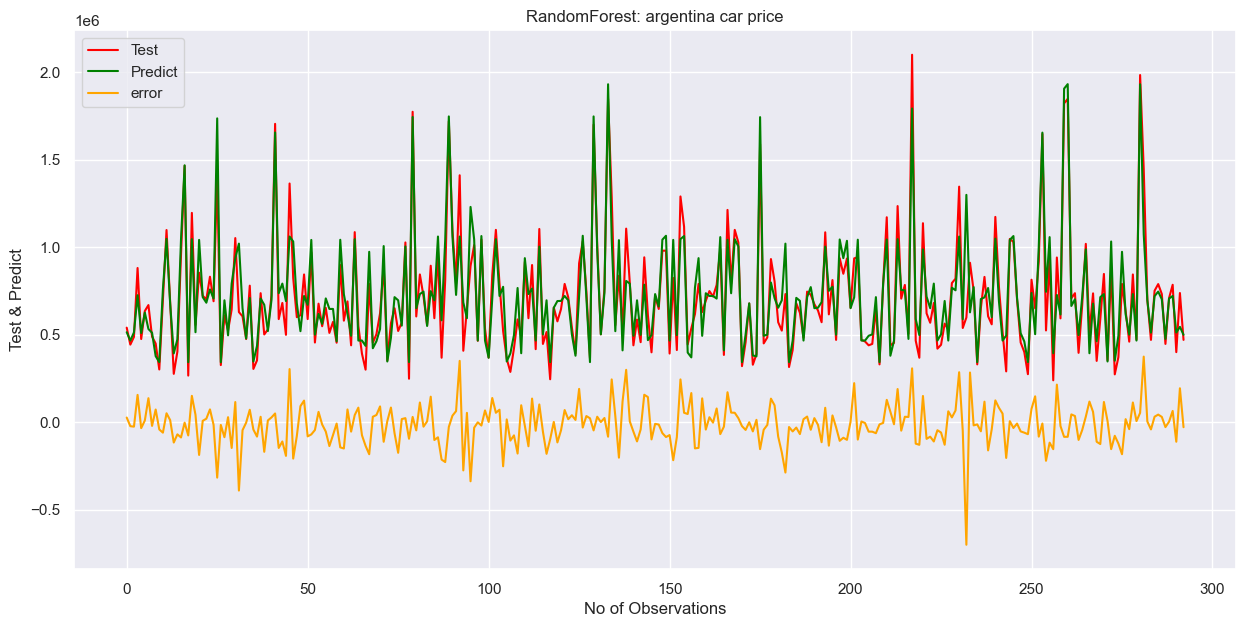

In [55]:
plt.figure(figsize=(15,7))
plt.plot(obsno, y_test, 'red')
plt.plot(obsno, y_pred, 'green')
plt.plot(obsno, resid, 'orange')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('RandomForest: argentina car price')
plt.legend(labels=('Test', 'Predict', 'error'), loc = 'upper left')
plt.show()

In [56]:
fi = pd.DataFrame({'feature': list (x_train.columns),
                   'importance': mod.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [57]:
fi

,feature,importance
12,Power_BHP,0.809006
1,Make_Year,0.091661
8,Fuel_Tank_Capacity_L,0.065228
13,Torque_Nm,0.011194
14,Mileage_kmpl,0.005086
0,Make,0.004782
3,Body_Type,0.003675
9,CC_Displacement,0.003004
15,Emission,0.001709
4,Mileage_Run,0.001650


In [58]:
#2nd model

In [59]:
regressor = RandomForestRegressor(n_estimators =100, max_depth = 4, random_state = 0 )

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 303 to 510
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  683 non-null    int64  
 1   Make_Year             683 non-null    int64  
 2   Color                 683 non-null    int64  
 3   Body_Type             683 non-null    int64  
 4   Mileage_Run           683 non-null    float64
 5   No_of_Owners          683 non-null    int64  
 6   Seating_Capacity      683 non-null    int64  
 7   Fuel_Type             683 non-null    int64  
 8   Fuel_Tank_Capacity_L  683 non-null    int64  
 9   CC_Displacement       683 non-null    int64  
 10  Transmission          683 non-null    int64  
 11  Transmission_Type     683 non-null    int64  
 12  Power_BHP             683 non-null    float64
 13  Torque_Nm             683 non-null    float64
 14  Mileage_kmpl          683 non-null    float64
 15  Emission             

In [61]:
x_train1 = x_train.iloc[:,[4,7,12,15]]
mod1 = regressor.fit(x_train1, y_train)

In [62]:
x_test1 = x_test.iloc[:,[4,7,12,15]]
y_pred1 = mod1. predict(x_test1)

In [63]:
mse1 = mean_squared_error(y_test, y_pred1)

In [64]:
mse1

22440950645.737503

In [65]:
RMSE1 = np.sqrt(mse1)
print(RMSE1)

149803.0395076732


In [66]:
obsno = np.arange(293)

In [67]:
resid1 = y_test - y_pred1

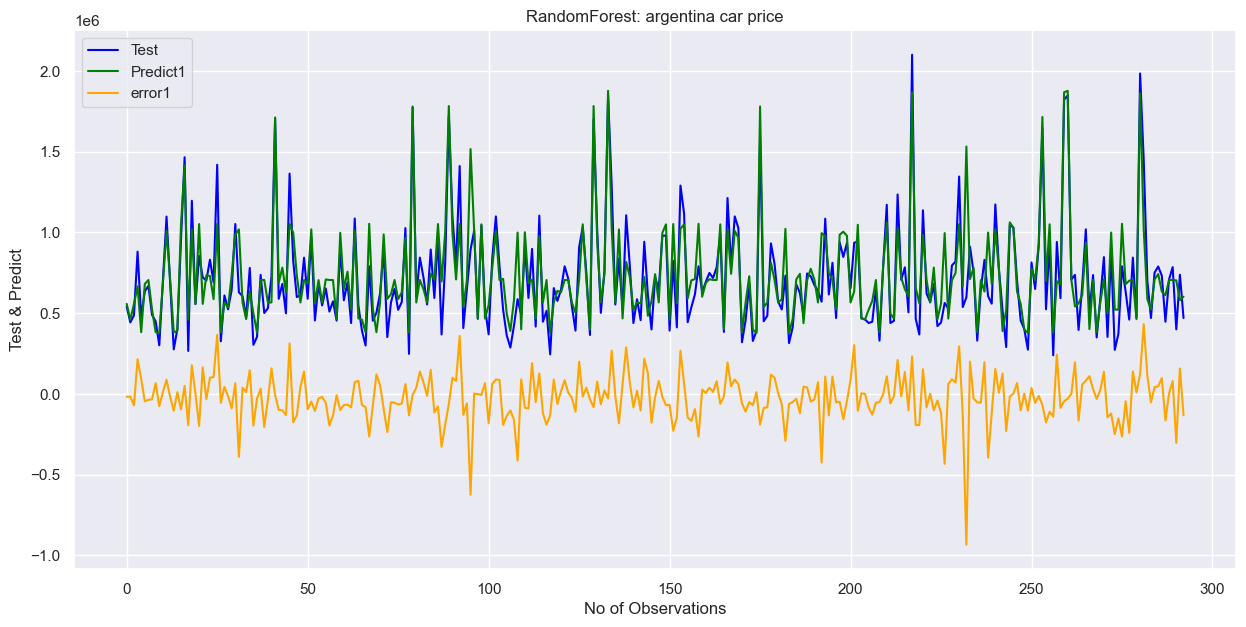

In [68]:
plt.figure(figsize=(15,7))
plt.plot(obsno, y_test, 'blue')
plt.plot(obsno, y_pred1, 'green')
plt.plot(obsno, resid1, 'orange')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('RandomForest: argentina car price')
plt.legend(labels=('Test', 'Predict1', 'error1'), loc = 'upper left')
plt.show()

In [69]:
#3rd model

In [70]:
param_grid = {'bootstrap': [True], 'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)
gmod = g_search.fit(x_train, y_train)

In [71]:
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 200}


In [72]:
gprd = gmod.predict(x_test)

In [73]:
mse_g = mean_squared_error(y_test, gprd)

In [74]:
mse_g

7742732800.281702

In [75]:
RMSE_g = np.sqrt(mse_g)
print(RMSE_g)

87992.79970703115


In [76]:
#4th model

In [77]:
rfr_random = RandomizedSearchCV(estimator = rfr,
                                param_distributions = param_grid,
                                n_iter = 20, cv= 3, random_state =421)

In [78]:
rmod = rfr_random.fit(x_train, y_train)

In [79]:
print(rmod.best_params_)

{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 17, 'bootstrap': True}


In [80]:
rprd = rmod.predict(x_test)

In [81]:
mse_r = mean_squared_error(y_test, rprd)

In [82]:
mse_r

8530369218.709501

In [83]:
RMSE_r = np.sqrt(mse_r)
print(RMSE_r)

92359.99793584613


In [84]:
#time

In [85]:
from timeit import default_timer

In [86]:
begining = default_timer()
gmod = g_search.fit(x_train, y_train)
ending = default_timer()
print((ending-begining)*1000)


142710.12260000862


In [87]:
begining = default_timer()
rmod = rfr_random.fit(x_train, y_train)
ending = default_timer()
print((ending-begining)*1000)

17933.30309999874
